# Machine Learning Project
## 1. The problem:
* **Objetive:** predict housing prices given a dataset of houses
* **How to frame the problem:** supervised learning, multivariate regression
* **Model:** choose between Linear Regression x KNN
* **Performance measure:** RMSE (Root Mean Square Error)


## Initial settings:

In [1]:
import numpy as np

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.rc('font', size=12) 
plt.rc('figure', figsize = (12, 5))

import seaborn as sns
print(sns.__version__)
assert sns.__version__ >= "0.10"
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 50)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

if not os.path.exists('output'):
    os.makedirs('output')
if not os.path.exists('output/session1'):
    os.makedirs('output/session1')

0.11.2


## 2. The data:

In [3]:
train_set = pd.read_csv('train_set.csv',index_col=0) 
validation_set = pd.read_csv('test_set.csv',index_col=0) 

In [4]:
print('There is', validation_set.shape[0], 'samples')
print('Each sample has', validation_set.shape[1], 'features')

There is 8148 samples
Each sample has 20 features


In [5]:
validation_set.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
0,Brighton,1a Mair St,3,h,S,Buxton,6/08/2016,11.2,3186.0,3.0,2.0,3.0,588.0,NaN,NaN,Bayside,-37.9287,144.9920,Southern Metropolitan,10579.0
1,West Melbourne,5/467 King St,2,u,S,Jellis,28/05/2016,1.9,3003.0,2.0,1.0,1.0,0.0,83.0,2002.0,Melbourne,-37.8091,144.9520,Northern Metropolitan,2230.0
2,St Kilda,7/29 Marine Pde,3,u,SP,McGrath,22/04/2017,6.1,3182.0,3.0,1.0,0.0,0.0,115.0,1930.0,Port Phillip,-37.8718,144.9767,Southern Metropolitan,13240.0
3,Pascoe Vale,8/16 Pascoe St,3,t,VB,Trimson,18/06/2016,9.9,3044.0,3.0,2.0,1.0,146.0,106.0,2006.0,Moreland,-37.7152,144.9346,Northern Metropolitan,7485.0
4,South Kingsville,2/77 Vernon St,2,h,SP,Gunn&Co,24/09/2016,9.1,3015.0,2.0,1.0,2.0,462.0,NaN,1970.0,Hobsons Bay,-37.8331,144.8715,Western Metropolitan,984.0


In [6]:
validation_set.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,8148.000000,8148.000000,8148.000000,8148.000000,8148.000000,8111.000000,8148.000000,4240.000000,4903.000000,8148.000000,8148.000000,8148.000000
mean,2.938513,10.082499,3104.467968,2.912985,1.531296,1.596721,572.657094,144.132764,1964.323679,-37.808895,144.995033,7465.003927
std,0.958331,5.781360,87.538551,0.950687,0.683228,0.948740,4993.979971,86.893702,37.950684,0.079193,0.102244,4385.255898
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,171.750000,93.000000,1940.000000,-37.856985,144.928845,4385.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,431.500000,126.000000,1970.000000,-37.802110,145.000100,6567.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,650.000000,173.000000,1999.000000,-37.755880,145.057550,10331.000000
max,10.000000,47.300000,3977.000000,10.000000,8.000000,9.000000,433014.000000,1561.000000,2017.000000,-37.483810,145.470520,21650.000000


(We will not work on the validation_set)

In [7]:
print('There is', train_set.shape[0], 'samples')
print('Each sample has', train_set.shape[1], 'features')

There is 5432 samples
Each sample has 21 features


In [8]:
train_set.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [9]:
train_set.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## 3. Exploring the data:
### Dataset description
#### Attributes:
**Suburb:** Suburb

**Address:** Address

**Rooms:** Number of rooms

**Type:**<br>
br - bedroom(s);<br>
h - house,cottage,villa, semi,terrace;<br>
u - unit, duplex;<br>
t - townhouse;<br>
dev site - development site;<br>
o res - other residential.

**Price:** Price in Australian dollars

**Method:**<br>
S - property sold;<br>
SP - property sold prior;<br>
PI - property passed in;<br>
PN - sold prior not disclosed;<br>
SN - sold not disclosed;<br>
NB - no bid;<br>
VB - vendor bid;<br>
W - withdrawn prior to auction;<br>
SA - sold after auction;<br>
SS - sold after auction price not disclosed.<br>
N/A - price or highest bid not available.

**SellerG:** Real Estate Agent

**Date:** Date sold

**Distance:** Distance from CBD in Kilometres

**Postcode:** Self explanatory

**Bedroom2:** Scraped # of Bedrooms (from different source)

**Bathroom:** Number of Bathrooms

**Car:** Number of carspots

**Landsize**: Land Size in Metres

**BuildingArea:** Building Size in Metres

**YearBuilt:** Year the house was built

**CouncilArea:** Governing council for the area

**Lattitude:** Self explanatory

**Longtitude:** Self explanatory

**Regionname:** General Region (West, North West, North, North east …etc)

**Propertycount:** Number of properties that exist in the suburb.

In [10]:
housing = train_set.copy()

In [11]:
housing

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5427,Reservoir,30 Kinsale St,3,h,851500.0,S,Nelson,22/08/2016,11.2,3073.0,3.0,1.0,1.0,0.0,NaN,1930.0,Darebin,-37.72170,144.99540,Northern Metropolitan,21650.0
5428,Fitzroy North,134 Clauscen St,2,h,1400000.0,S,Nelson,26/08/2017,3.6,3068.0,2.0,1.0,1.0,164.0,93.0,1890.0,NaN,-37.77796,144.98374,Northern Metropolitan,6244.0
5429,Richmond,23a Dickmann St,3,t,975000.0,PI,Jellis,22/08/2016,2.6,3121.0,3.0,1.0,1.0,383.0,NaN,1993.0,Yarra,-37.82480,144.99760,Northern Metropolitan,14949.0


### Understanding the data:

In [12]:
housing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5432 entries, 0 to 5431
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5432 non-null   object 
 1   Address        5432 non-null   object 
 2   Rooms          5432 non-null   int64  
 3   Type           5432 non-null   object 
 4   Price          5432 non-null   float64
 5   Method         5432 non-null   object 
 6   SellerG        5432 non-null   object 
 7   Date           5432 non-null   object 
 8   Distance       5432 non-null   float64
 9   Postcode       5432 non-null   float64
 10  Bedroom2       5432 non-null   float64
 11  Bathroom       5432 non-null   float64
 12  Car            5407 non-null   float64
 13  Landsize       5432 non-null   float64
 14  BuildingArea   2890 non-null   float64
 15  YearBuilt      3302 non-null   float64
 16  CouncilArea    4879 non-null   object 
 17  Lattitude      5432 non-null   float64
 18  Longtitu

#### Numerical data:

In [14]:
housing.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,3106.552835,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,95.185290,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


#### Categorical data:

In [15]:
housing.select_dtypes(include=['object']).head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
index,,,,,,,,
0,Aberfeldie,241 Buckley St,h,VB,Nelson,12/08/2017,Moonee Valley,Western Metropolitan
1,Northcote,67 Charles St,h,SP,Jellis,20/05/2017,Darebin,Northern Metropolitan
2,Balwyn North,42 Maud St,h,PI,Jellis,15/10/2016,Boroondara,Southern Metropolitan
3,Brunswick,13 Percy St,h,S,Nelson,7/05/2016,Moreland,Northern Metropolitan
4,Templestowe Lower,253 Thompsons Rd,h,VB,hockingstuart,13/08/2016,Manningham,Eastern Metropolitan


In [16]:
housing['Postcode'] = pd.Categorical(housing.Postcode)
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0


In [17]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,5432.000000,5.432000e+03,5432.000000,5432.000000,5432.000000,5407.000000,5432.000000,2890.000000,3302.000000,5432.000000,5432.000000,5432.000000
mean,2.937224,1.078470e+06,10.220692,2.917342,1.538660,1.630109,537.054676,163.462430,1965.219564,-37.809664,144.995491,7438.537555
std,0.951947,6.470654e+05,5.996967,0.988414,0.704286,0.982855,1550.867601,843.189116,36.244398,0.079365,0.106382,4368.906756
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,182.750000,92.000000,1940.000000,-37.856648,144.930800,4294.000000
50%,3.000000,9.015000e+05,9.200000,3.000000,1.000000,2.000000,450.000000,125.000000,1970.000000,-37.802635,145.000250,6543.000000
75%,3.000000,1.330000e+06,13.000000,3.000000,2.000000,2.000000,654.250000,174.750000,1999.000000,-37.757238,145.059225,10331.000000
max,8.000000,8.000000e+06,48.100000,20.000000,8.000000,10.000000,75100.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


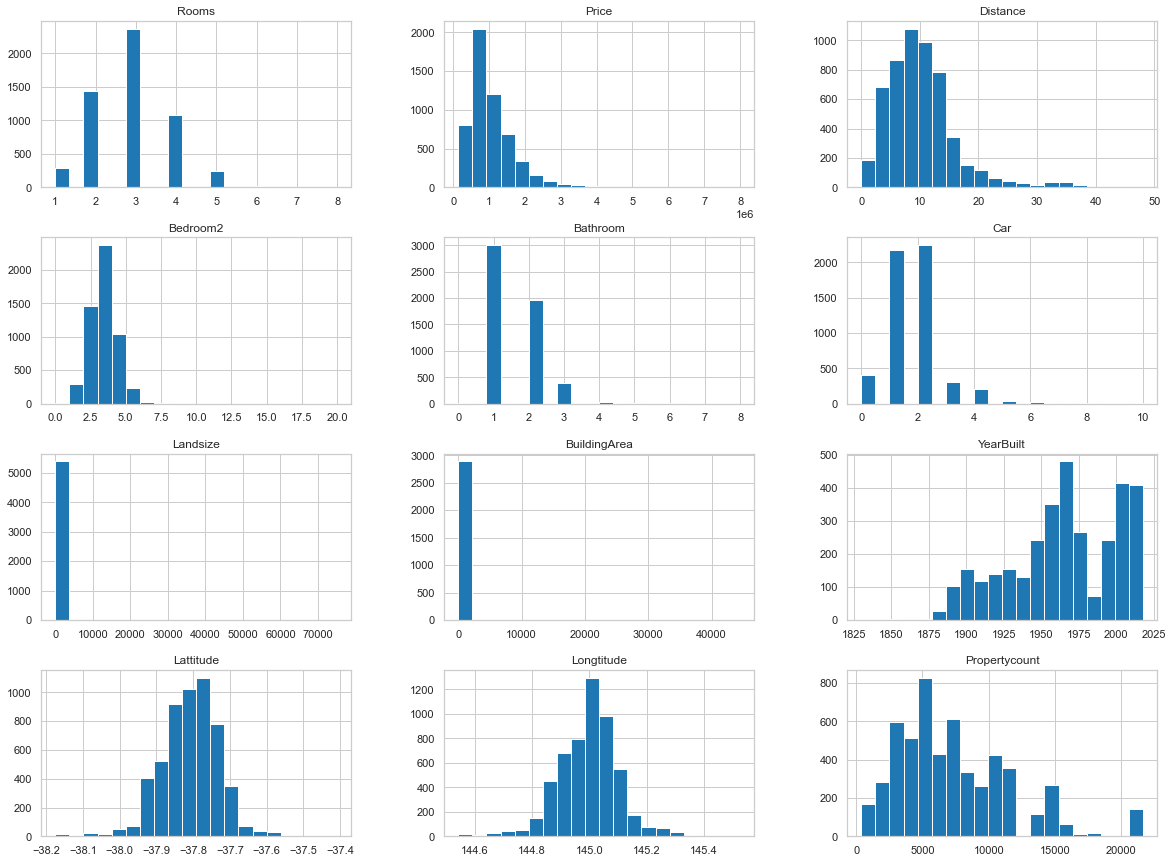

In [18]:
housing.hist(bins=20, figsize=(20,15))
plt.show()

### Splitting the data
#### Creating train and test sets:

<AxesSubplot:>

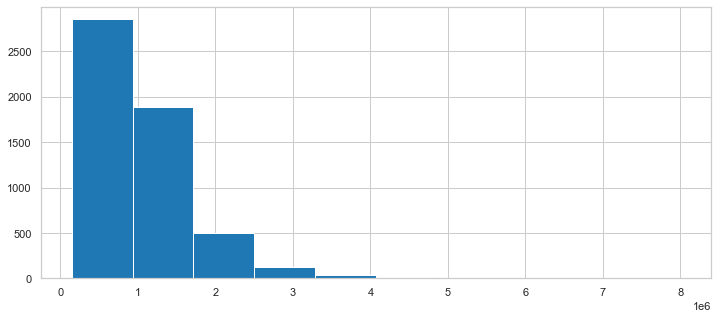

In [19]:
housing['Price'].hist()

#### Categories by price:

In [20]:
housing['price_cat'] = pd.cut(housing['Price'],
                             bins=[0, 500000, 1000000, 1500000, 2000000, np.inf],
                             labels=[1, 2, 3, 4, 5])

In [21]:
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price_cat
index,,,,,,,,,,,,,,,,,,,,,,
0,Aberfeldie,241 Buckley St,4,h,1380000.0,VB,Nelson,12/08/2017,7.5,3040.0,4.0,2.0,2.0,766.0,NaN,NaN,Moonee Valley,-37.75595,144.90551,Western Metropolitan,1543.0,3
1,Northcote,67 Charles St,2,h,1100000.0,SP,Jellis,20/05/2017,5.5,3070.0,2.0,1.0,1.0,189.0,NaN,NaN,Darebin,-37.77670,144.99240,Northern Metropolitan,11364.0,3
2,Balwyn North,42 Maud St,3,h,1480000.0,PI,Jellis,15/10/2016,9.2,3104.0,3.0,1.0,4.0,605.0,116.0,1950.0,Boroondara,-37.79510,145.06960,Southern Metropolitan,7809.0,3
3,Brunswick,13 Percy St,3,h,1055000.0,S,Nelson,7/05/2016,5.2,3056.0,3.0,1.0,1.0,324.0,NaN,1930.0,Moreland,-37.76530,144.95860,Northern Metropolitan,11918.0,3
4,Templestowe Lower,253 Thompsons Rd,4,h,1000000.0,VB,hockingstuart,13/08/2016,13.8,3107.0,4.0,3.0,2.0,728.0,164.0,1970.0,Manningham,-37.76800,145.10270,Eastern Metropolitan,5420.0,2


In [22]:
housing['price_cat'].value_counts()

2    2498
3    1286
1     646
4     597
5     405
Name: price_cat, dtype: int64

<AxesSubplot:>

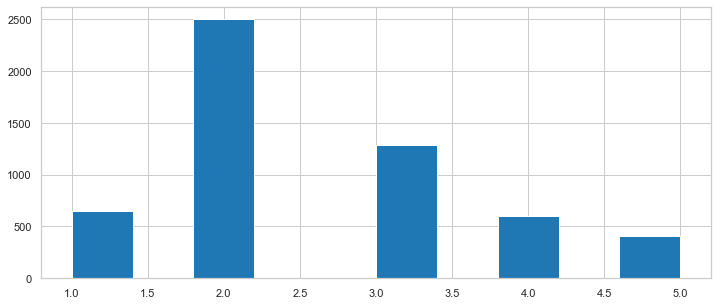

In [23]:
housing['price_cat'].hist()

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['price_cat']):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]

#### Checking:

In [25]:
stratified_test_set['price_cat'].value_counts() / len(stratified_test_set)

2    0.459982
3    0.236431
1    0.118675
4    0.110396
5    0.074517
Name: price_cat, dtype: float64

In [26]:
housing['price_cat'].value_counts() / len(housing)

2    0.459867
3    0.236745
1    0.118925
4    0.109904
5    0.074558
Name: price_cat, dtype: float64

In [27]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop('price_cat', axis=1, inplace=True)

In [28]:
stratified_test_set

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
3814,Brighton,139 Cole St,5,h,5500000.0,VB,Marshall,3/09/2017,10.5,3186.0,5.0,5.0,2.0,830.0,NaN,NaN,NaN,-37.89544,145.00279,Southern Metropolitan,10579.0
4785,Elsternwick,4/49 Seymour Rd,3,t,1200000.0,S,Biggin,22/07/2017,7.2,3185.0,3.0,1.0,2.0,1405.0,117.0,1965.0,Glen Eira,-37.88065,145.01112,Southern Metropolitan,4898.0
5162,Ivanhoe,55 Livingstone St,4,h,1650000.0,PI,Miles,8/04/2017,7.9,3079.0,4.0,2.0,1.0,589.0,185.0,1910.0,Banyule,-37.76710,145.03700,Eastern Metropolitan,5549.0
2331,Moonee Ponds,1/21 Holmes Rd,2,u,574000.0,S,Jellis,27/11/2016,6.9,3039.0,2.0,2.0,1.0,159.0,NaN,NaN,Moonee Valley,-37.76660,144.91840,Western Metropolitan,6232.0
3061,Seddon,64 Pilgrim St,3,h,880000.0,SP,Jas,15/10/2016,6.6,3011.0,3.0,1.0,0.0,216.0,125.0,1890.0,Maribyrnong,-37.80520,144.89410,Western Metropolitan,2417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4526,Fitzroy North,74 Best St,2,h,1321000.0,S,Woodards,27/05/2017,3.6,3068.0,2.0,1.0,1.0,167.0,NaN,NaN,Yarra,-37.78219,144.98371,Northern Metropolitan,6244.0
534,Brighton,1A Baker St,3,h,2450000.0,S,Nick,18/03/2017,11.2,3186.0,3.0,3.0,2.0,482.0,NaN,NaN,Bayside,-37.91200,144.99940,Southern Metropolitan,10579.0
3205,Bentleigh East,40 Waratah St,4,t,950000.0,PI,Buxton,18/03/2017,13.9,3165.0,4.0,2.0,1.0,450.0,NaN,1940.0,Glen Eira,-37.91330,145.08370,Southern Metropolitan,10969.0


In [29]:
stratified_train_set

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,1740000.0,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0
3712,Moorabbin,3/13 Perry St,3,t,920000.0,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,NaN,NaN,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,930000.0,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,NaN,NaN,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0
2957,Wantirna South,12/440 Stud Rd,3,u,622000.0,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0
2115,Richmond,5/33 Goodwood St,2,u,630000.0,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,NaN,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,Maribyrnong,104 Gatehouse Pl,2,u,420000.0,SP,Biggin,7/05/2016,8.7,3032.0,2.0,1.0,2.0,5661.0,103.0,1940.0,Maribyrnong,-37.77300,144.88060,Western Metropolitan,4918.0
335,Heathmont,1/34 Campbell St,2,u,525000.0,S,Fletchers,15/07/2017,21.3,3135.0,2.0,1.0,1.0,0.0,80.0,1980.0,Maroondah,-37.82118,145.24138,Eastern Metropolitan,3794.0
5338,Bayswater,85 Begonia Av,3,h,755000.0,S,iTRAK,23/09/2017,23.2,3153.0,3.0,2.0,4.0,782.0,NaN,NaN,NaN,-37.85002,145.25964,Eastern Metropolitan,5030.0


In [30]:
housing = stratified_train_set.copy()

### Visualizing the data:

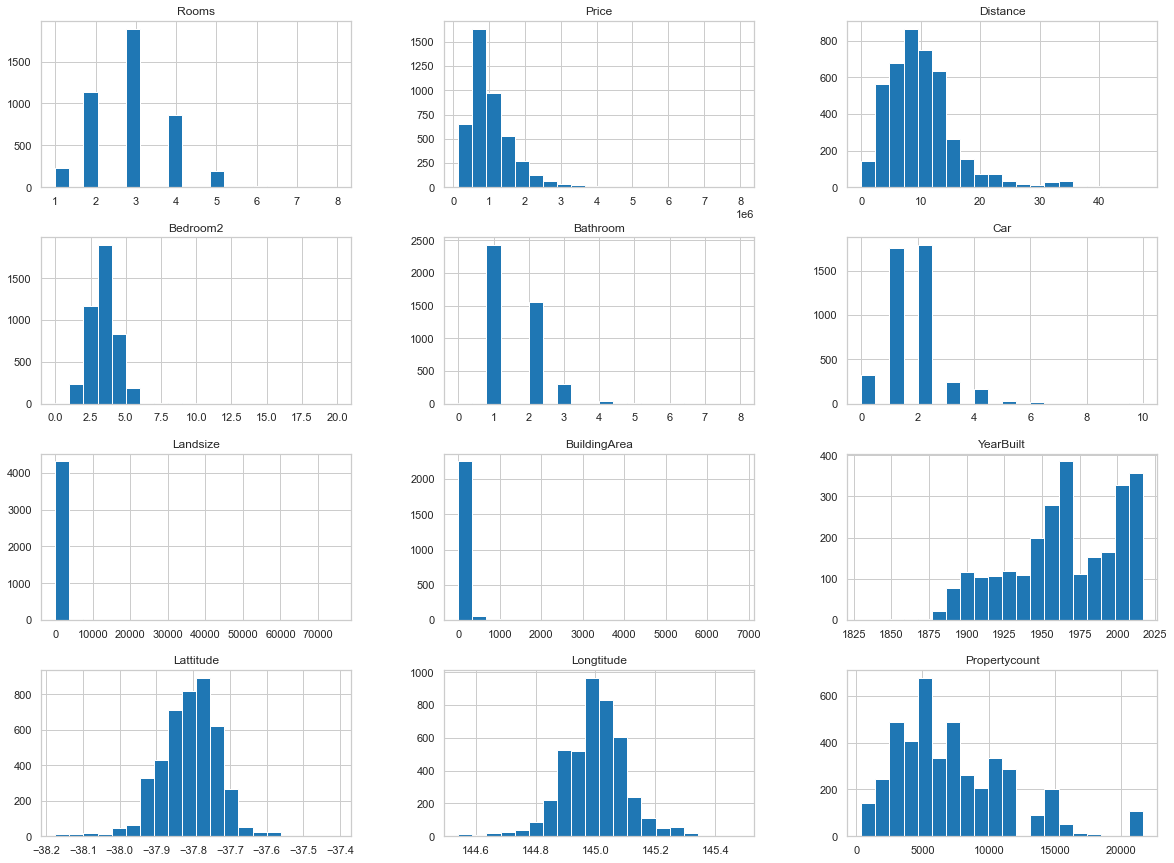

In [31]:
housing.hist(bins=20, figsize=(20,15))
plt.show()

##### Types:

In [32]:
housing['Type'].describe()

count     4345
unique       3
top          h
freq      3004
Name: Type, dtype: object

In [33]:
housing['Type'].value_counts()

h    3004
u     962
t     379
Name: Type, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Type'>

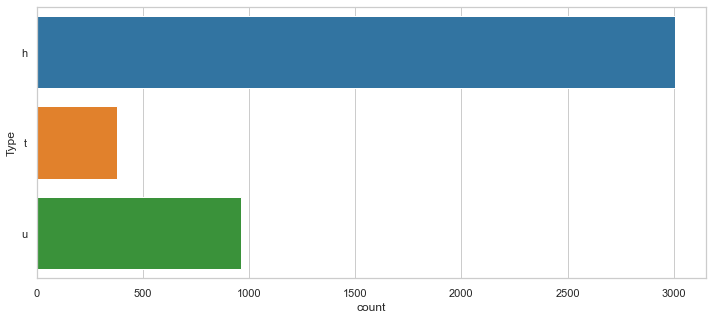

In [34]:
sns.countplot(y='Type', data=housing)

##### Year of sale:

In [35]:
housing['Year_sale'] = pd.DatetimeIndex(housing['Date']).year
housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year_sale
index,,,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,1740000.0,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0,2016
3712,Moorabbin,3/13 Perry St,3,t,920000.0,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,NaN,NaN,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0,2017
4915,Reservoir,44 Mendip Rd,4,h,930000.0,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,NaN,NaN,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0,2017
2957,Wantirna South,12/440 Stud Rd,3,u,622000.0,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0,2017
2115,Richmond,5/33 Goodwood St,2,u,630000.0,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,NaN,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0,2017


In [36]:
housing['Year_sale'].value_counts()

2017    2328
2016    2017
Name: Year_sale, dtype: int64

Not relevant!

##### Prices:

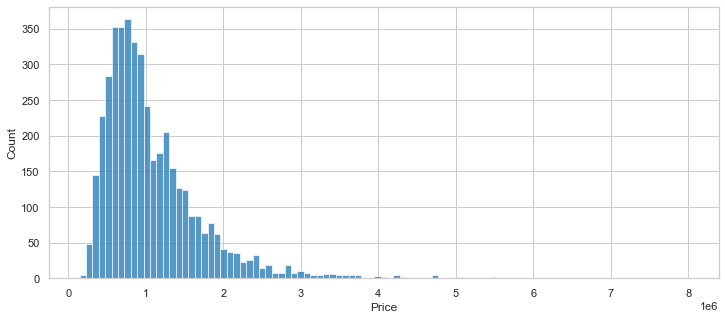

In [37]:
sns.histplot(housing['Price'])
plt.show()

##### Rooms:

<AxesSubplot:xlabel='count', ylabel='Rooms'>

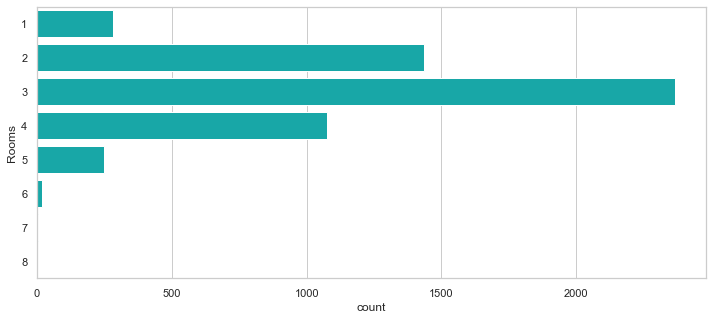

In [38]:
sns.countplot(y='Rooms', data=train_set, color='c')

#### Geographical data:

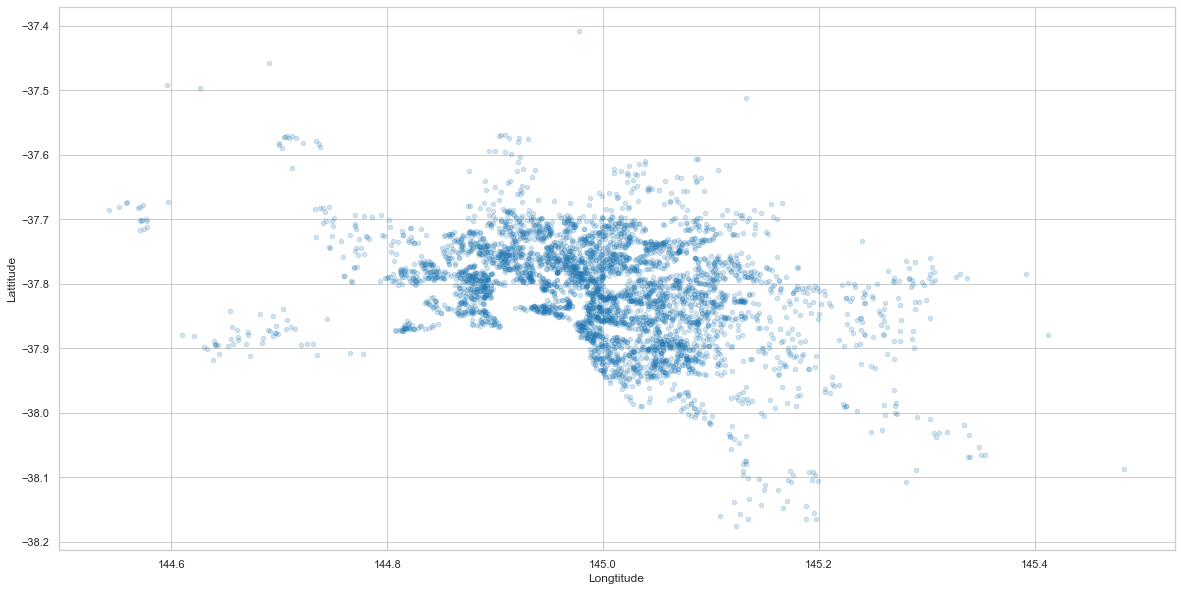

In [39]:
housing.plot(kind = 'scatter', x='Longtitude', y='Lattitude', alpha=0.2,
            figsize=(20,10))
plt.show()

##### By price:

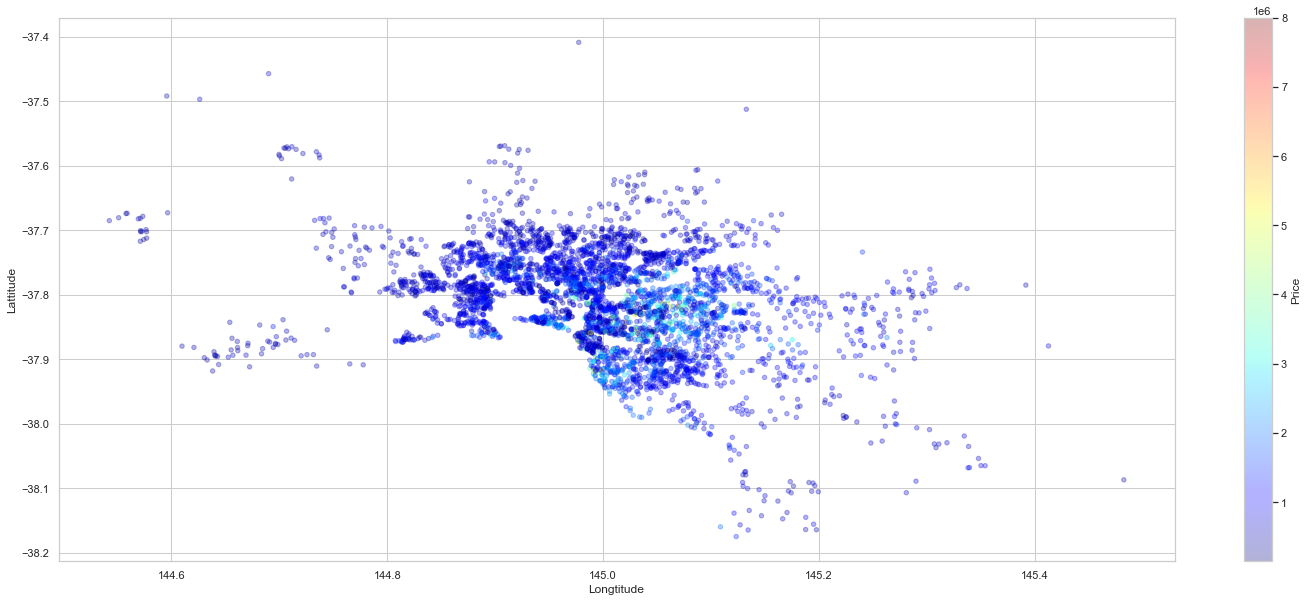

In [40]:
housing.plot(kind = 'scatter', x='Longtitude', y='Lattitude', alpha=0.3,
            figsize=(25,10),
            c='Price', cmap=plt.get_cmap('jet'), colorbar='True',
            sharex=False)
plt.show()

##### Price / Landsize:

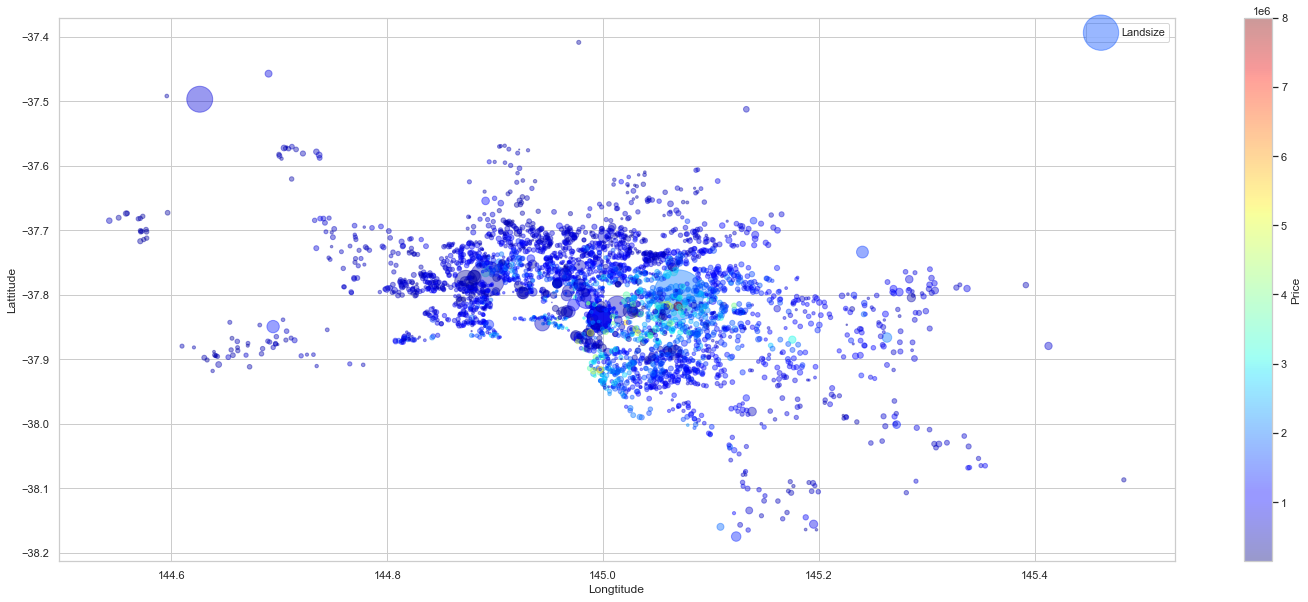

In [41]:
housing.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.4,
            s=housing['Landsize']/30, label='Landsize',
            figsize=(25,10),
            c='Price', cmap=plt.get_cmap('jet'), colorbar='True',
            sharex=False)
plt.show()

##### Price / Building area:

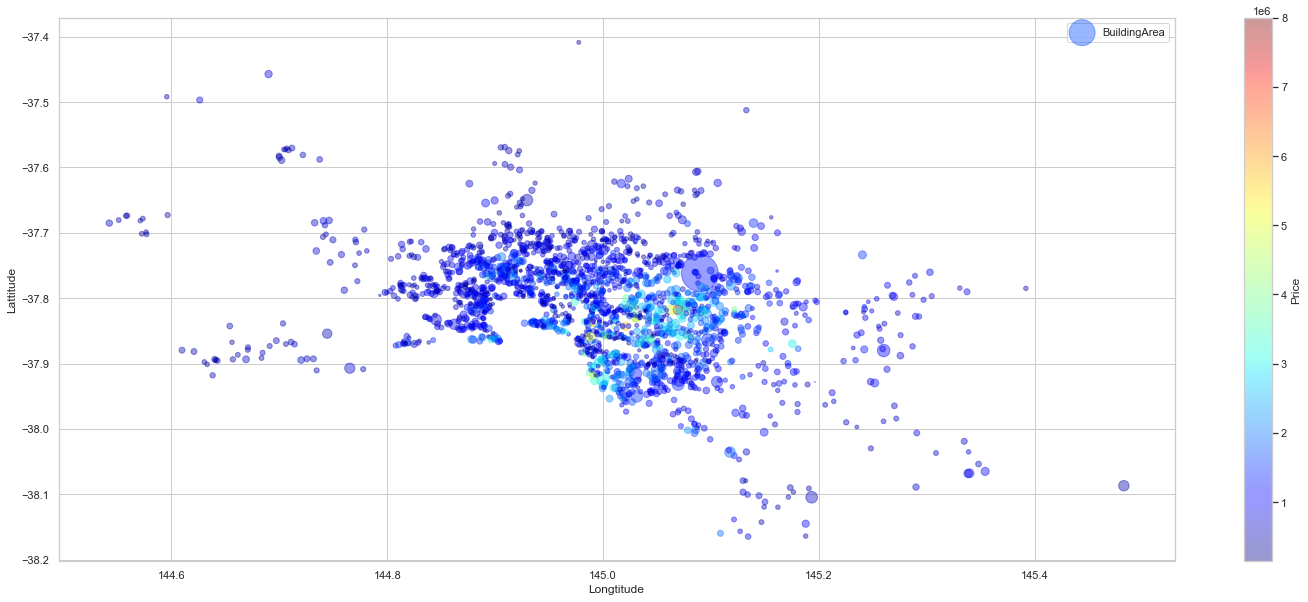

In [42]:
housing.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.4,
            s=housing['BuildingArea']/5, label='BuildingArea',
            figsize=(25,10),
            c='Price', cmap=plt.get_cmap('jet'), colorbar='True',
            sharex=False)
plt.show()

##### Price / Distance from CBD:

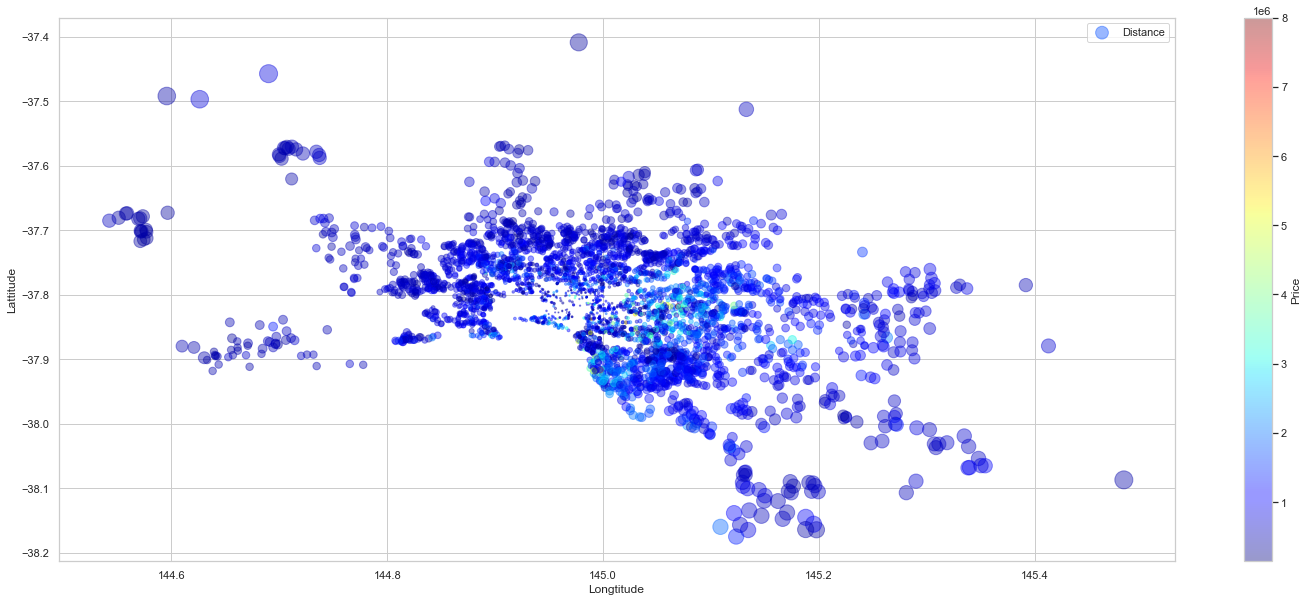

In [43]:
housing.plot(kind='scatter', x='Longtitude', y='Lattitude', alpha=0.4,
            s=housing['Distance']**1.5, label='Distance',
            figsize=(25,10),
            c='Price', cmap=plt.get_cmap('jet'), colorbar='True',
            sharex=False)
plt.show()

### Finding correlations:

In [44]:
corr_matrix = housing.corr()

In [45]:
corr_matrix['Price'].sort_values(ascending=False)

Price            1.000000
Rooms            0.487933
Bedroom2         0.450010
Bathroom         0.442478
BuildingArea     0.265870
Car              0.213664
Longtitude       0.189497
Landsize         0.051059
Year_sale        0.002846
Propertycount   -0.032002
Distance        -0.173708
Lattitude       -0.198889
YearBuilt       -0.354215
Name: Price, dtype: float64

#### Most significant correlations:
* Rooms<br>
* Bedroom2<br>
* Bathroom<br>
* YearBuilt<br>
* BuildingArea

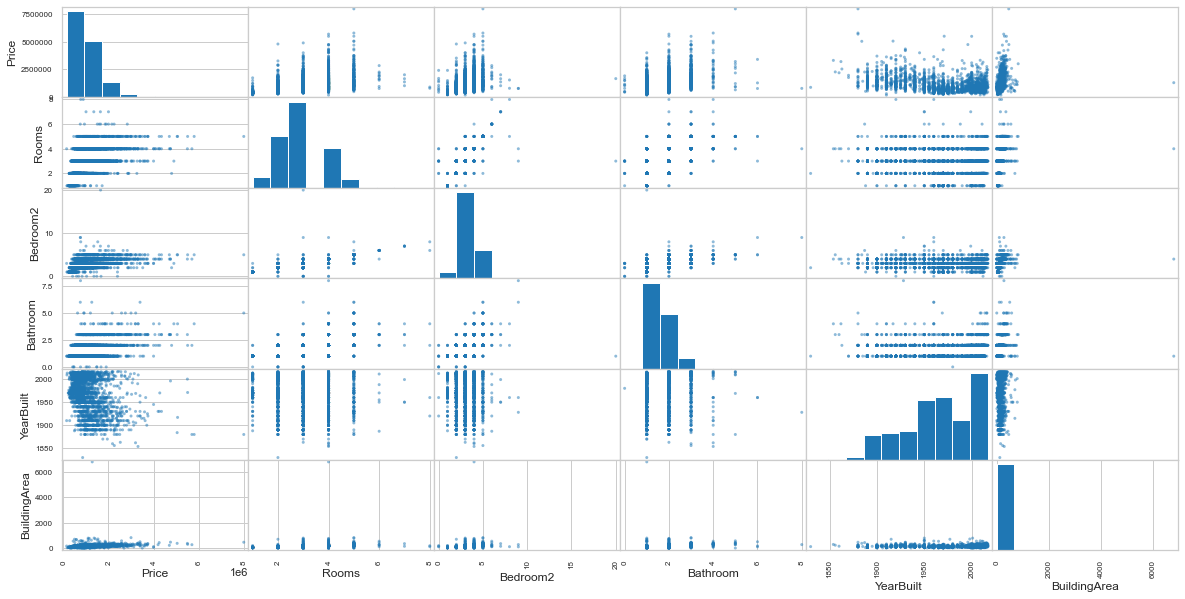

In [46]:
from pandas.plotting import scatter_matrix

attributes = ['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'YearBuilt', 'BuildingArea']
scatter_matrix(housing[attributes], figsize=(20, 10))
plt.show()

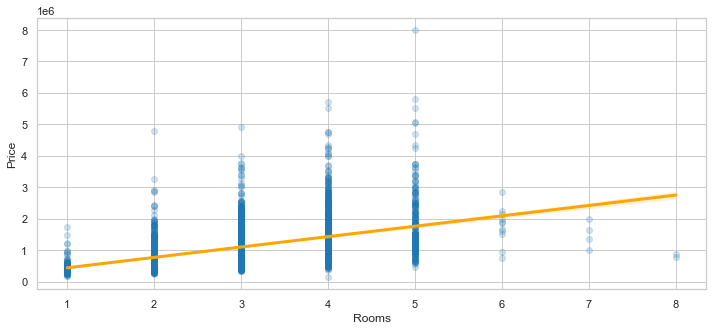

In [47]:
sns.regplot(data=housing, x='Rooms', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.show()

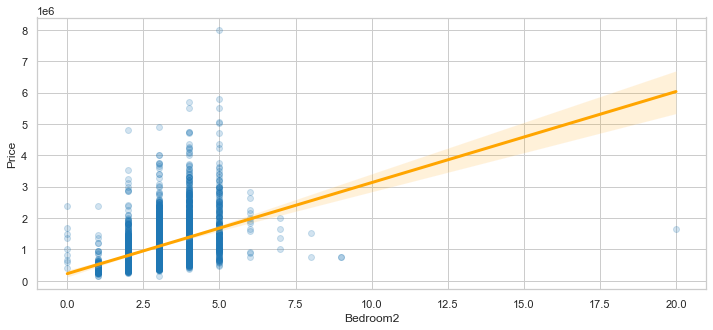

In [48]:
sns.regplot(data=housing, x='Bedroom2', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.show()

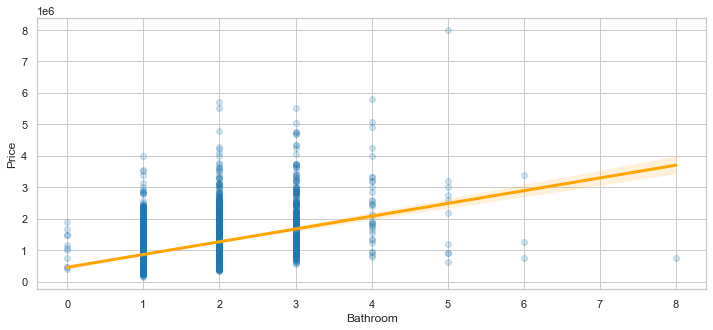

In [49]:
sns.regplot(data=housing, x='Bathroom', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.show()

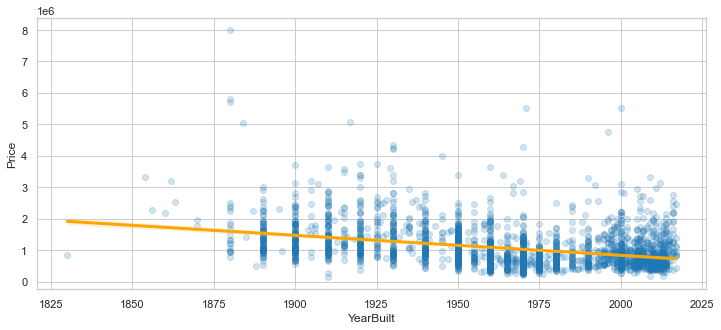

In [50]:
sns.regplot(data=housing, x='YearBuilt', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.show()

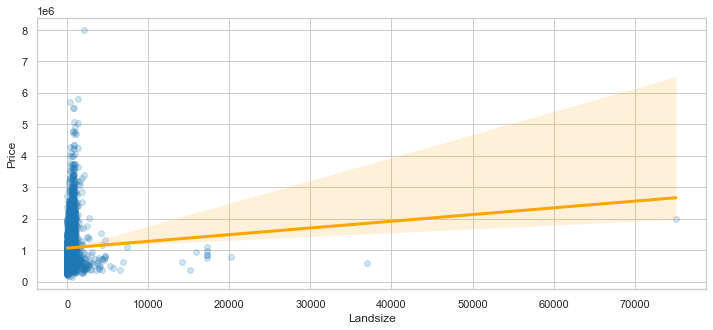

In [51]:
sns.regplot(data=housing, x='Landsize', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.show()

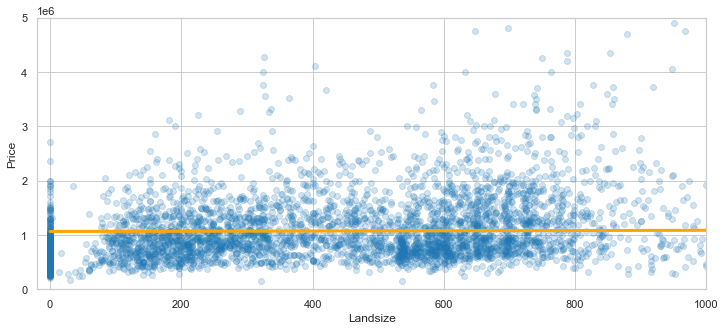

In [52]:
sns.regplot(data=housing, x='Landsize', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.axis([-20, 1000, 0, 5e6])
plt.show()

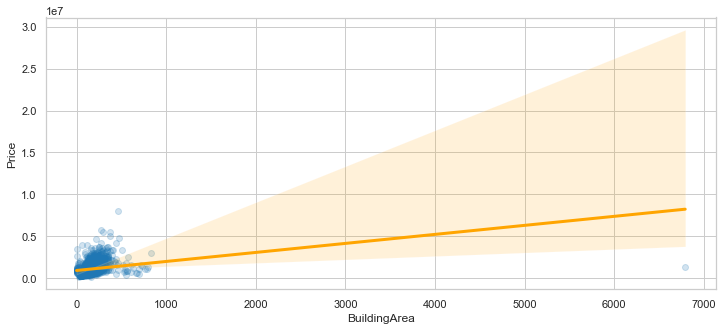

In [53]:
sns.regplot(data=housing, x='BuildingArea', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.show()

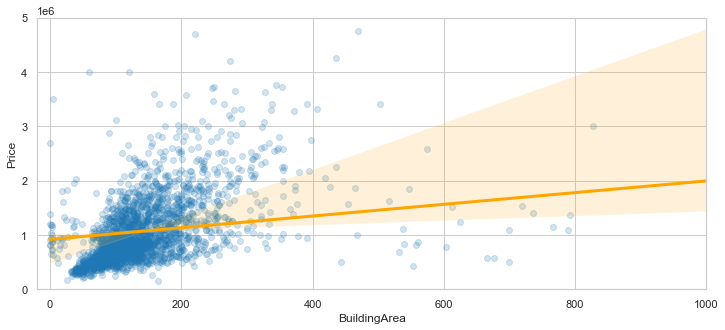

In [54]:
sns.regplot(data=housing, x='BuildingArea', y='Price', line_kws={'color': 'orange'}, scatter_kws={'alpha':0.2})
plt.axis([-20, 1000, 0, 5e6])
plt.show()

## 4. Preparing the data:
### Removing outliers:


In [55]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year_sale
count,4345.000000,4.345000e+03,4345.000000,4345.000000,4345.000000,4326.000000,4345.000000,2314.000000,2643.000000,4345.000000,4345.000000,4345.000000,4345.000000
mean,2.933026,1.075276e+06,10.257077,2.915305,1.533257,1.625058,531.242808,146.213439,1965.088914,-37.810694,144.996836,7341.139931,2016.535788
std,0.950370,6.430367e+05,6.071930,0.997099,0.701459,0.983781,1542.095328,162.525403,36.307565,0.079887,0.106853,4344.860422,0.498775
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000,2016.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,184.000000,92.000000,1940.000000,-37.857600,144.932800,4181.000000,2016.000000
50%,3.000000,9.010000e+05,9.200000,3.000000,1.000000,2.000000,443.000000,125.000000,1970.000000,-37.802740,145.000600,6482.000000,2017.000000
75%,3.000000,1.325000e+06,13.000000,3.000000,2.000000,2.000000,654.000000,173.000000,1999.000000,-37.758000,145.059500,10331.000000,2017.000000
max,8.000000,8.000000e+06,47.400000,20.000000,8.000000,10.000000,75100.000000,6791.000000,2017.000000,-37.408530,145.482730,21650.000000,2017.000000


In [56]:
housing.describe(percentiles=[0.01, 0.05, 0.95, 0.995])

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year_sale
count,4345.000000,4.345000e+03,4345.000000,4345.000000,4345.000000,4326.000000,4345.000000,2314.000000,2643.000000,4345.000000,4345.000000,4345.000000,4345.000000
mean,2.933026,1.075276e+06,10.257077,2.915305,1.533257,1.625058,531.242808,146.213439,1965.088914,-37.810694,144.996836,7341.139931,2016.535788
std,0.950370,6.430367e+05,6.071930,0.997099,0.701459,0.983781,1542.095328,162.525403,36.307565,0.079887,0.106853,4344.860422,0.498775
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000,2016.000000
1%,1.000000,3.000000e+05,1.600000,1.000000,1.000000,0.000000,0.000000,14.260000,1880.000000,-38.039726,144.686600,851.440000,2016.000000
5%,1.000000,4.011000e+05,2.600000,1.000000,1.000000,0.000000,0.000000,51.000000,1900.000000,-37.936280,144.830400,2079.000000,2016.000000
50%,3.000000,9.010000e+05,9.200000,3.000000,1.000000,2.000000,443.000000,125.000000,1970.000000,-37.802740,145.000600,6482.000000,2017.000000
95%,4.000000,2.259000e+06,21.500000,4.000000,3.000000,4.000000,990.800000,284.350000,2013.000000,-37.701542,145.163224,14949.000000,2017.000000
99.5%,5.000000,4.000000e+06,35.400000,5.000000,4.000000,6.000000,4306.080000,618.220000,2016.000000,-37.584184,145.302860,21650.000000,2017.000000
max,8.000000,8.000000e+06,47.400000,20.000000,8.000000,10.000000,75100.000000,6791.000000,2017.000000,-37.408530,145.482730,21650.000000,2017.000000


In [57]:
housing[housing['Landsize']>housing['Landsize'].quantile(0.995)].shape

(22, 22)

In [58]:
housing = housing[housing['Landsize']<=housing['Landsize'].quantile(0.995)]

In [59]:
housing.shape

(4323, 22)

### Missing data:

In [60]:
housing.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Year_sale
count,4323.000000,4.323000e+03,4323.000000,4323.000000,4323.000000,4304.000000,4323.000000,2301.000000,2625.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,2.935693,1.076620e+06,10.268240,2.917881,1.532501,1.625000,459.331945,146.447804,1964.916571,-37.810799,144.997042,7327.481841,2016.535045
std,0.950672,6.439113e+05,6.049876,0.997666,0.702047,0.984041,413.088162,162.931073,36.271444,0.079895,0.106811,4336.504884,0.498828
min,1.000000,1.450000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000,2016.000000
25%,2.000000,6.500000e+05,6.200000,2.000000,1.000000,1.000000,183.000000,92.000000,1940.000000,-37.857775,144.932750,4048.000000,2016.000000
50%,3.000000,9.010000e+05,9.200000,3.000000,1.000000,2.000000,439.000000,126.000000,1970.000000,-37.802740,145.000900,6482.000000,2017.000000
75%,3.000000,1.325000e+06,13.000000,3.000000,2.000000,2.000000,650.500000,174.000000,1999.000000,-37.757850,145.059715,10175.000000,2017.000000
max,8.000000,8.000000e+06,47.400000,20.000000,8.000000,10.000000,4296.000000,6791.000000,2017.000000,-37.408530,145.482730,21650.000000,2017.000000


#### Incomplete data found in:
* Car<br>
* BuildingArea<br>
* YearBuilt<br>

In [61]:
housing[['Landsize','BuildingArea']].head(15)

,Landsize,BuildingArea
index,,
3637,739.0,155.0
3712,230.0,NaN
4915,635.0,NaN
2957,137.0,71.0
2115,0.0,NaN
3837,0.0,NaN
4363,88.0,60.0
1837,0.0,89.0
2736,0.0,NaN


#### A lot of 0s found in:
* Landsize

##### In order not to change the predictions, we will separate the 'price' column:

In [62]:
housing = stratified_train_set.drop('Price', axis=1)
housing_labels = stratified_train_set['Price'].copy()

In [63]:
housing.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3637,Moonee Ponds,2 Parry St,5,h,S,Brad,27/06/2016,6.9,3039.0,4.0,1.0,2.0,739.0,155.0,1930.0,Moonee Valley,-37.76130,144.91770,Western Metropolitan,6232.0
3712,Moorabbin,3/13 Perry St,3,t,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,NaN,NaN,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,NaN,NaN,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0
2957,Wantirna South,12/440 Stud Rd,3,u,S,Ray,15/07/2017,14.7,3152.0,3.0,1.0,1.0,137.0,71.0,2012.0,Knox,-37.87615,145.23192,Eastern Metropolitan,7082.0
2115,Richmond,5/33 Goodwood St,2,u,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,NaN,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0


In [64]:
housing_labels.head()

index
3637    1740000.0
3712     920000.0
4915     930000.0
2957     622000.0
2115     630000.0
Name: Price, dtype: float64

### Data cleaning:

In [65]:
housing_incomplete_rows = housing[housing.isnull().any(axis=1)]
print(housing.shape[0],housing_incomplete_rows.shape[0])
housing_incomplete_rows.head()

4345 2340


,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
index,,,,,,,,,,,,,,,,,,,,
3712,Moorabbin,3/13 Perry St,3,t,S,hockingstuart,29/07/2017,14.3,3189.0,3.0,2.0,2.0,230.0,NaN,NaN,Kingston,-37.93793,145.04048,Southern Metropolitan,2555.0
4915,Reservoir,44 Mendip Rd,4,h,S,Barry,20/05/2017,11.2,3073.0,4.0,1.0,3.0,635.0,NaN,NaN,Darebin,-37.72050,145.01650,Northern Metropolitan,21650.0
2115,Richmond,5/33 Goodwood St,2,u,SP,Biggin,8/07/2017,2.4,3121.0,2.0,1.0,1.0,0.0,NaN,1970.0,Yarra,-37.81977,144.99597,Northern Metropolitan,14949.0
3837,Newport,1/217 Woods St,3,h,S,Raine,4/03/2017,8.4,3015.0,3.0,2.0,2.0,0.0,NaN,2013.0,Hobsons Bay,-37.84470,144.86540,Western Metropolitan,5498.0
2736,Toorak,6/2 Tintern Av,2,u,S,hockingstuart,22/07/2017,4.1,3142.0,2.0,2.0,1.0,0.0,NaN,NaN,Stonnington,-37.84139,145.00678,Southern Metropolitan,7217.0


In [66]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [67]:
housing_num = housing.select_dtypes(include=[np.number])

In [68]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

#### Checking:

In [69]:
imputer.statistics_

array([ 3.000000e+00,  9.200000e+00,  3.000000e+00,  1.000000e+00,
        2.000000e+00,  4.430000e+02,  1.250000e+02,  1.970000e+03,
       -3.780274e+01,  1.450006e+02,  6.482000e+03])

In [70]:
housing_num.median().values

array([ 3.000000e+00,  9.200000e+00,  3.000000e+00,  1.000000e+00,
        2.000000e+00,  4.430000e+02,  1.250000e+02,  1.970000e+03,
       -3.780274e+01,  1.450006e+02,  6.482000e+03])

In [71]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)

In [72]:
housing_tr.loc[housing_incomplete_rows.index.values]

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
index,,,,,,,,,,,
3712,3.0,14.3,3.0,2.0,2.0,230.0,125.0,1970.0,-37.93793,145.04048,2555.0
4915,4.0,11.2,4.0,1.0,3.0,635.0,125.0,1970.0,-37.72050,145.01650,21650.0
2115,2.0,2.4,2.0,1.0,1.0,0.0,125.0,1970.0,-37.81977,144.99597,14949.0
3837,3.0,8.4,3.0,2.0,2.0,0.0,125.0,2013.0,-37.84470,144.86540,5498.0
2736,2.0,4.1,2.0,2.0,1.0,0.0,125.0,1970.0,-37.84139,145.00678,7217.0
...,...,...,...,...,...,...,...,...,...,...,...
1217,5.0,23.0,5.0,3.0,3.0,857.0,285.0,2012.0,-37.79773,145.26956,11925.0
5181,3.0,4.0,3.0,2.0,1.0,138.0,122.0,1998.0,-37.76292,144.97975,5533.0
391,3.0,8.7,3.0,1.0,2.0,696.0,125.0,1970.0,-37.78320,144.88640,4918.0


In [73]:
housing_tr.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000,4345.000000
mean,2.933026,10.257077,2.915305,1.533257,1.626697,531.242808,136.297560,1967.012658,-37.810694,144.996836,7341.139931
std,0.950370,6.071930,0.997099,0.701459,0.981939,1542.095328,119.065869,28.416457,0.079887,0.106853,4344.860422
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,-38.174880,144.542370,389.000000
25%,2.000000,6.200000,2.000000,1.000000,1.000000,184.000000,121.000000,1960.000000,-37.857600,144.932800,4181.000000
50%,3.000000,9.200000,3.000000,1.000000,2.000000,443.000000,125.000000,1970.000000,-37.802740,145.000600,6482.000000
75%,3.000000,13.000000,3.000000,2.000000,2.000000,654.000000,130.000000,1975.000000,-37.758000,145.059500,10331.000000
max,8.000000,47.400000,20.000000,8.000000,10.000000,75100.000000,6791.000000,2017.000000,-37.408530,145.482730,21650.000000


It works!

#### Handling Categorical attributes:

In [74]:
housing_cat = housing[['CouncilArea']]
housing_cat.head(5)

,CouncilArea
index,
3637,Moonee Valley
3712,Kingston
4915,Darebin
2957,Knox
2115,Yarra


In [75]:
housing_cat.describe()

,CouncilArea
count,3897
unique,32
top,Boroondara
freq,375


In [76]:
housing_cat.fillna('Unknown').head(10)

,CouncilArea
index,
3637,Moonee Valley
3712,Kingston
4915,Darebin
2957,Knox
2115,Yarra
3837,Hobsons Bay
4363,Darebin
1837,Yarra
2736,Stonnington


In [77]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(handle_unknown='ignore')
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.fillna('Unknown'))
housing_cat_1hot

<4345x33 sparse matrix of type '<class 'numpy.float64'>'
	with 4345 stored elements in Compressed Sparse Row format>

In [78]:
housing_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
cat_encoder.categories_

[array(['Banyule', 'Bayside', 'Boroondara', 'Brimbank', 'Cardinia',
        'Casey', 'Darebin', 'Frankston', 'Glen Eira', 'Greater Dandenong',
        'Hobsons Bay', 'Hume', 'Kingston', 'Knox', 'Macedon Ranges',
        'Manningham', 'Maribyrnong', 'Maroondah', 'Melbourne', 'Melton',
        'Monash', 'Moonee Valley', 'Moreland', 'Nillumbik', 'Port Phillip',
        'Stonnington', 'Unavailable', 'Unknown', 'Whitehorse',
        'Whittlesea', 'Wyndham', 'Yarra', 'Yarra Ranges'], dtype=object)]

### Transformation Pipelines:

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

#### Function to replace 0 by NaN:

In [81]:
def replace_0_2_NaN(data):
    data[data == 0] = np.nan
    return data

In [82]:
num0_pipeline = Pipeline([
        ('zeros2NaN',FunctionTransformer(func = replace_0_2_NaN,validate=False)),
        ('imputer', SimpleImputer(strategy='median')),
        ('log',FunctionTransformer(np.log1p, validate=True)),
        ('std_scaler', StandardScaler()),
    ])

In [83]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [84]:
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant',fill_value='Unknown')),
        ('one_hot_encoder', OneHotEncoder(handle_unknown='ignore')),
    ])

In [85]:
from sklearn.compose import ColumnTransformer

num_attribs0 = ['Landsize','BuildingArea']
num_attribs1 = list(housing_num)
cat_attribs = ['CouncilArea','Type','Suburb','Postcode']

full_pipeline = ColumnTransformer([
        ('num', num0_pipeline, num_attribs0),
        ('num1', num_pipeline, num_attribs1),
        ('cat', cat_pipeline, cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

housing_prepared

<4345x515 sparse matrix of type '<class 'numpy.float64'>'
	with 73865 stored elements in Compressed Sparse Row format>

## 5. Selecting and Training a Model:
### 5.1 Linear Regression:

In [86]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

#### Checking:

In [87]:
some_data = housing.iloc[:20]
some_labels = housing_labels.iloc[:20]
some_data_prepared = full_pipeline.transform(some_data)
print('Predictions:', lin_reg.predict(some_data_prepared))

Predictions: [1613228.22407685  857309.83256296 1099965.67191043  140287.09995639
  652464.63601482 1007365.10101795  548036.16638135  723533.68459957
 1382927.28375179  -29128.50001326  952589.90065054 1486059.75196921
  725177.80073926 -313634.47268286  454663.7295341   784950.63242307
 1121551.5710588  1133058.93013295  788084.29890315   71781.36224013]


In [88]:
print('Labels:', list(some_labels))

Labels: [1740000.0, 920000.0, 930000.0, 622000.0, 630000.0, 785000.0, 525500.0, 800000.0, 920000.0, 335000.0, 680000.0, 1660000.0, 595999.0, 315000.0, 597500.0, 601000.0, 1080000.0, 1250000.0, 650000.0, 282000.0]


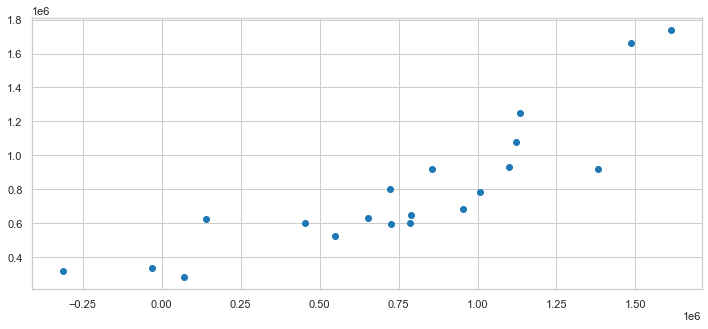

In [89]:
plt.scatter(lin_reg.predict(some_data_prepared),list(some_labels))

#### Score:

In [90]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

351048.2817199867

### 5.2 K-Nearest Neighbour:

In [91]:
from sklearn import neighbors

n_neighbors = 3
knn_reg = neighbors.KNeighborsRegressor(n_neighbors)
knn_reg.fit(housing_prepared, housing_labels)

KNeighborsRegressor(n_neighbors=3)

In [92]:
housing_predictions = knn_reg.predict(housing_prepared)
knn_mse = mean_squared_error(housing_labels, housing_predictions)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

247526.01853211626

### Comparing the models:

In [93]:
from sklearn.model_selection import cross_val_score

In [94]:
def display_scores(scores,model_name = None):
    if(model_name):
        print("----",model_name,"----")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [95]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-lin_scores,'Linear Regression')

---- Linear Regression ----
Mean: 375209.3150991118
Standard deviation: 49972.54386256166


In [96]:
knn_scores = cross_val_score(knn_reg, housing_prepared, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
display_scores(-knn_scores,'Knn Regression')

---- Knn Regression ----
Mean: 364131.7703670684
Standard deviation: 46997.75328658845


#### Comparing the results, K-Nearest Neighbour seems to be more efficient than Linear Regression!

After testing, using all columns proved to be more efficient to the predictions than just the selected attributes.
Therefore, we used in the final model all columns from the data set.

## 6. Evaluating the System on the Test Set:

In [97]:
final_model = knn_reg

stratified_test_set = stratified_test_set.copy()

X_test = stratified_test_set.drop('Price', axis=1)
y_test = stratified_test_set['Price'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [98]:
final_rmse

351948.67292026285

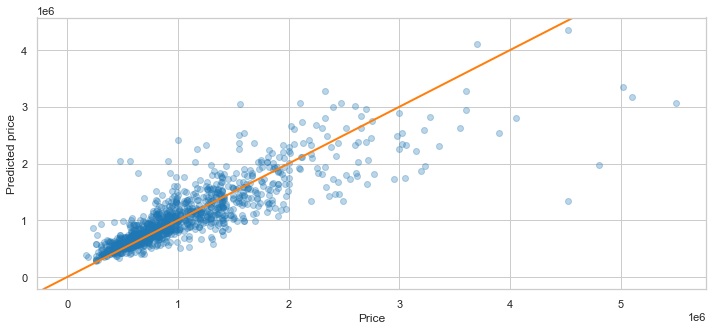

In [99]:
plt.scatter(y_test, final_predictions, c='C0', alpha=0.3)
plt.axline((0,0),(1,1), c='C1')
plt.xlabel('Price')
plt.ylabel('Predicted price');
plt.show()

In [101]:
X_test = full_pipeline.transform(validation_set)
y_pred = final_model.predict(X_test)

df_output = pd.DataFrame(y_pred)
df_output = df_output.reset_index()
df_output.columns = ['index','Price']

df_output.to_csv('daniela_file.csv',index=False)

___

#### Reference:
GÉRON, Aurélien. Hands-On Machine Learning with Scikit-Learn & TensorFlow